### **Plotting the PNG images**

In [2]:
%matplotlib inline

In [3]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.9.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# for elementary image manipulation
import imageio

# specifies the default figure size for this notebook
plt.rcParams['figure.figsize'] = (5, 5)

# specifies the default color map
plt.rcParams['image.cmap'] = 'gray'

In [59]:
raw_test = imageio.imread('C:/Users/rmartinez/Documents/Aberdeen Hackaton 16Nov18/Project/Data/RAW FULL CHUNKED/ESP2D_RAW_FULL_KPSTM_STACK_008A094_1000_1100.png',
                              as_gray=True)
print("Image size:")
raw_test.shape

Image size:


(1001, 102)

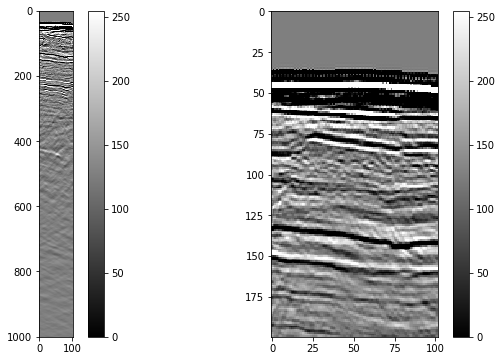

In [60]:
#Plotting
fig,axs=plt.subplots(figsize=(12,6), ncols=2)
ax=axs[0]
im=ax.imshow(raw_test, aspect=1)
fig.colorbar(im, ax=ax)
ax.grid(False)

ax=axs[1]
im=ax.imshow(raw_test[0:200,], aspect=1)
fig.colorbar(im, ax=ax)
ax.grid(False)

### **Random Sample of files**

In [58]:
import os

path, dirs, files = next(os.walk("C:/Users/rmartinez/Documents/Aberdeen Hackaton 16Nov18/Project/Data/RAW FULL CHUNKED"))
RAW_file_count = len(files)

path, dirs, files = next(os.walk("C:/Users/rmartinez/Documents/Aberdeen Hackaton 16Nov18/Project/Data/FINAL FULL CHUNKED"))
FINAL_file_count = len(files)

print("Total files: %(n)s" % {'n':RAW_file_count+FINAL_file_count})
print("Total RAW files: %(n)s Percentage RAW: %(p)s" % {'n':RAW_file_count, 'p':round(RAW_file_count/(RAW_file_count+FINAL_file_count),2)})
print("Total FINAL files: %(n)s Percentage FINAL: %(p)s" % {'n':FINAL_file_count,'p':round(FINAL_file_count/(RAW_file_count+FINAL_file_count),2)})
print ("Train Sample:")
print("60%% Sample size: %(n)s files" % {'n':round((RAW_file_count+FINAL_file_count)*.6,0)})


Total files: 12568
Total RAW files: 5898 Percentage RAW: 0.47
Total FINAL files: 6670 Percentage FINAL: 0.53
Train Sample:
60% Sample size: 7541.0 files


In [9]:
# not used
import random

files=range(1, 5898)
sample=np.array(random.sample(files,3544))
print (sample)

[3446 1295 1625 ... 4062 1495 5343]


In [31]:
# not used
from glob import glob
from random import shuffle

pngs = glob('C:/Users/rmartinez/Documents/Aberdeen Hackaton 16Nov18/Project/Data/Raw Rename/*.png')

for j in pngs:
    print(j)


C:/Users/rmartinez/Documents/Aberdeen Hackaton 16Nov18/Project/Data/Raw Rename\ESP2D_RAW_FULL_KPSTM_STACK_008A094_1800_1900.png
C:/Users/rmartinez/Documents/Aberdeen Hackaton 16Nov18/Project/Data/Raw Rename\ESP2D_RAW_FULL_KPSTM_STACK_008A094_1900_2000.png
C:/Users/rmartinez/Documents/Aberdeen Hackaton 16Nov18/Project/Data/Raw Rename\ESP2D_RAW_FULL_KPSTM_STACK_008A094_2000_2100.png
C:/Users/rmartinez/Documents/Aberdeen Hackaton 16Nov18/Project/Data/Raw Rename\ESP2D_RAW_FULL_KPSTM_STACK_008A094_2100_2200.png
C:/Users/rmartinez/Documents/Aberdeen Hackaton 16Nov18/Project/Data/Raw Rename\ESP2D_RAW_FULL_KPSTM_STACK_008A094_2200_2300.png
C:/Users/rmartinez/Documents/Aberdeen Hackaton 16Nov18/Project/Data/Raw Rename\ESP2D_RAW_FULL_KPSTM_STACK_008A094_2300_2400.png
C:/Users/rmartinez/Documents/Aberdeen Hackaton 16Nov18/Project/Data/Raw Rename\ESP2D_RAW_FULL_KPSTM_STACK_008A094_2400_2500.png
C:/Users/rmartinez/Documents/Aberdeen Hackaton 16Nov18/Project/Data/Raw Rename\ESP2D_RAW_FULL_KPSTM_STAC

In [40]:
#----> png images

import os
from random import shuffle
from glob import glob
from sklearn.model_selection import train_test_split

rawDir='C:/Users/rmartinez/Documents/Aberdeen Hackaton 16Nov18/Project/Data/RAW FULL CHUNKED/'
pairs = []
file_list=glob('C:/Users/rmartinez/Documents/Aberdeen Hackaton 16Nov18/Project/Data/FINAL_FULL_CHUNKED/*.png')
shuffle(file_list)
for finalname in file_list:
    rawname = rawDir + "ESP2D_RAW_" + os.path.basename(finalname).split('ESP2D_FINAL_')[-1]
    if os.path.isfile(rawname):
        pairs.append((finalname, rawname))

train, test = train_test_split(pairs, train_size=0.6)

In [46]:
train[0:5]
os.path.isfile('C:/Users/rmartinez/Documents/Aberdeen Hackaton 16Nov18/Project/Data/FINAL_FULL_CHUNKED\\ESP2D_FINAL_FULL_KPSTM_STACK_058A060_2500_2600.png')

True

In [47]:
#----> jpg images
# you need to change the directories to where your jpg's images are

import os
from random import shuffle
from glob import glob
from sklearn.model_selection import train_test_split

rawDir='C:/Users/rmartinez/Documents/Aberdeen Hackaton 16Nov18/Project/Data/RAW AMP CHUNKED/'
pairs = []
file_list=glob('C:/Users/rmartinez/Documents/Aberdeen Hackaton 16Nov18/Project/Data/FINAL AMP CHUNKED/*.jpg')
shuffle(file_list)
for finalname in file_list:
    rawname = rawDir + "ESP2D_RAW_" + os.path.basename(finalname).split('ESP2D_FINAL_')[-1]
    if os.path.isfile(rawname):
        pairs.append((finalname, rawname))

train, test = train_test_split(pairs, train_size=0.6)

In [48]:
import shutil
# Before running this you need to create the folders where the data will go into. 
# Example: 
# C:/ blah blah/Train Data/
# C:/ blah blah/Train Data/Raw
# C:/ blah blah/Train Data/Final

for final, raw in train:
    dst_dir='C:/Users/rmartinez/Documents/Aberdeen Hackaton 16Nov18/Project/Data/TrainData2/'
    shutil.copyfile(final,os.path.join(dst_dir,'Final',os.path.basename(final)))
    shutil.copyfile(raw,os.path.join(dst_dir,'Raw',os.path.basename(raw)))
    
#copyfile(source(fullpath and extension),destination(fullpath and extension))

# Will have to do the same for test